# Kaggle Competition 

In [1]:
import numpy as np
import pandas as pd
import polars as pl
import joblib
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from xgboost import XGBRegressor

# Load train/val data

In [2]:
train_data = pd.read_parquet("data/train_data.parquet")

In [3]:
train_data.shape

(11774752, 101)

In [4]:
val_data = pd.read_parquet("data/validate_data.parquet")

In [5]:
val_data.shape

(639848, 101)

# define parameter

In [6]:
# feature selection ## select every feature except 0-4 
# feature_cols = ["symbol_id", "time_id"] + [f"feature_{idx:02d}" for idx in range(79)]+ [f"responder_{idx}_lag_1" for idx in range(9)]
feature_cols = [f"feature_{idx:02d}" for idx in range(79)]+ [f"responder_{idx}_lag_1" for idx in range(9)]

#select target values
target_cols = ["responder_6"]

# select the weight values
weight_cols = ["weight"]

In [7]:
def validate_n_fold(model,X_val, y_val,w_val, n_folds):
    global ScaleY
    batch_size = len(y_val)//n_folds    
    for i in range(0, len(X_val), batch_size):
        X_batch = X_val[i:i+batch_size]
        y_batch = y_val[i:i+batch_size]
        w_batch = w_val[i:i+batch_size]
        preds = model.predict(X_batch)
        pred_inverse = ScaleY.inverse_transform(preds.reshape(-1, 1))
        score1 = r2_score(y_batch, pred_inverse ,sample_weight= w_batch)
        print(f'Batch {i//batch_size} r2_score: {score1:.6f}')

# data scaling

In [8]:
from sklearn.preprocessing import MinMaxScaler

ScaleX =    joblib.load("model/XGBoost_scaleX.pkl")
ScaleY =    joblib.load("model/XGBoost_scaleY.pkl")

C:\Users\Asus\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.6.0 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [9]:
# the chunk requir maximum memory
X_train =   ScaleX.transform(train_data[feature_cols])
y_train =   ScaleY.transform(train_data[target_cols])
w_train =   train_data[weight_cols]
X_val =     ScaleX.transform(val_data[feature_cols])    
y_val =     val_data[target_cols]
w_val =     val_data[weight_cols]

del train_data , val_data # free memory

# import model

In [10]:
model1 =    joblib.load("model/XGBoost_best_model.pkl")     # +.0056
model2 =    joblib.load("model/XGBoost_test.pkl")           # -.0027
model3 =    joblib.load("model/XGBoost_test2.pkl")          # +.0048
model4 =    joblib.load("model/XGBoost_test3.pkl")          # +.0056
model5 =    joblib.load("model/XGBoost_test4.pkl")          # +.0031
model6 =    joblib.load("model/XGBoost_test5.pkl")          # +.0036
model7 =    joblib.load("model/XGBoost_test6.pkl")          # +.0055
model8 =    joblib.load("model/XGBoost_test7.pkl")          # -.0039

c:\Users\Asus\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [03:14:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\data\../common/error_msg.h:80: If you are loading a serialized model (like pickle in Python, RDS in R) or
configuration generated by an older version of XGBoost, please export the model by calling
`Booster.save_model` from that version first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/stable/tutorials/saving_model.html

for more details about differences between saving model and serializing.

  warnings.warn(smsg, UserWarning)


# Check model similarity

In [11]:
pred1 =  model1.predict(X_val)
pred2 =  model2.predict(X_val)
pred3 =  model3.predict(X_val)
pred4 =  model4.predict(X_val)
pred5 =  model5.predict(X_val)
pred6 =  model6.predict(X_val)
pred7 =  model7.predict(X_val)
pred8 =  model8.predict(X_val)

c:\Users\Asus\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [03:14:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


In [12]:
pred = pd.DataFrame({   "model1" : pred1,
                        "model2" : pred2,
                        "model3" : pred3,
                        "model4" : pred4,
                        "model5" : pred5,
                        "model6" : pred6,
                        "model7" : pred7,
                        "model8" : pred8,})
pred

,model1,model2,model3,model4,model5,model6,model7,model8
0,0.022032,-0.028459,0.017497,0.007831,-0.013838,0.003105,0.023006,-0.009650
1,-0.003363,-0.018539,-0.012484,0.009942,0.012984,-0.005308,0.002233,-0.003250
2,0.004450,0.024342,0.006404,0.016712,0.014487,0.007649,0.005654,-0.002227
3,0.038181,0.040879,0.032267,0.034393,0.044959,0.037036,0.030703,0.042168
4,0.012290,0.027862,0.017298,-0.002759,0.013623,0.011431,0.018248,0.016159
...,...,...,...,...,...,...,...,...
639843,0.026052,0.028898,0.025450,0.017451,0.027823,0.029814,0.024169,0.032657
639844,-0.012304,-0.019221,-0.013911,-0.007987,-0.018562,-0.014962,-0.013555,-0.023799
639845,-0.009321,-0.017225,-0.012937,-0.011713,-0.006807,-0.004792,-0.009156,-0.010902
639846,-0.007428,0.002412,-0.006752,-0.009391,-0.002379,0.000225,-0.005836,0.019543


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
# Compute Pearson correlation
pearson_corr = pred.corr(method='pearson')
print("Pearson Correlation Matrix:")
print(pearson_corr)

Pearson Correlation Matrix:
          model1    model2    model3    model4    model5    model6    model7  \
model1  1.000000  0.764057  0.898208  0.889800  0.834460  0.859985  0.937490   
model2  0.764057  1.000000  0.773919  0.733418  0.811315  0.820522  0.819111   
model3  0.898208  0.773919  1.000000  0.873608  0.855201  0.856724  0.916733   
model4  0.889800  0.733418  0.873608  1.000000  0.828541  0.818574  0.904122   
model5  0.834460  0.811315  0.855201  0.828541  1.000000  0.848188  0.886090   
model6  0.859985  0.820522  0.856724  0.818574  0.848188  1.000000  0.893050   
model7  0.937490  0.819111  0.916733  0.904122  0.886090  0.893050  1.000000   
model8  0.788315  0.767629  0.791285  0.750740  0.795437  0.820268  0.826989   

          model8  
model1  0.788315  
model2  0.767629  
model3  0.791285  
model4  0.750740  
model5  0.795437  
model6  0.820268  
model7  0.826989  
model8  1.000000  


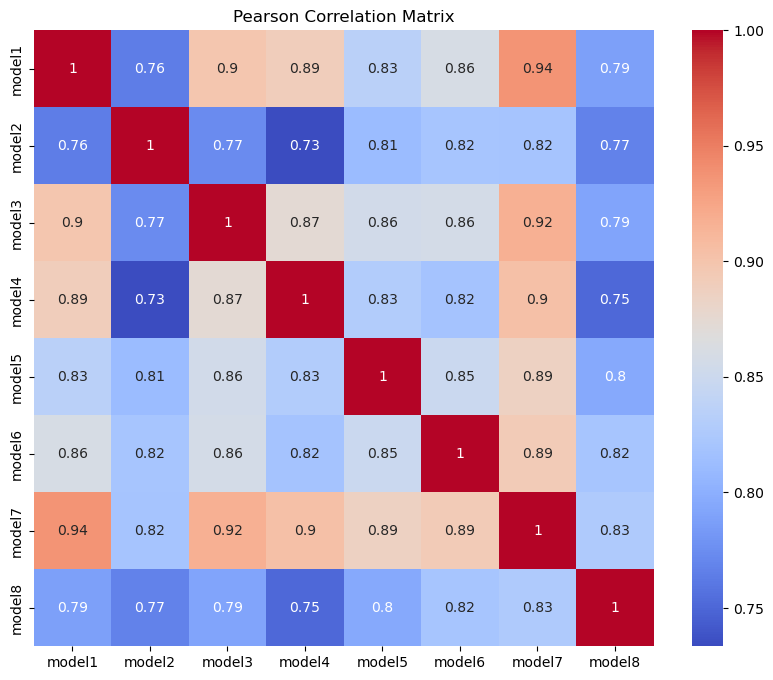

In [15]:
# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm')
plt.title('Pearson Correlation Matrix')
plt.show()

# model ensemble

## voitng c

In [16]:
from sklearn.ensemble import VotingRegressor

In [17]:
model9 = joblib.load("model/XGBoost_voting_ensemble.pkl") # +.0060
model10 = joblib.load("model/XGBoost_voting_ensemble3.pkl") # +.0059

In [18]:
ensemble_model = VotingRegressor(estimators=[
    ('model1', model1),
    # ('model2', model2),
    # ('model3', model3),
    ('model4', model4),
    # ('model5', model5),
    # ('model6', model6),
    ('model7', model7),
    # ('model8', model8),
    ('model9', model9),
    ('model10', model10),
])  # Use 'hard' for majority voting or 'soft' for weighted average probabilities

# Fit the ensemble model (assuming you have training data X_train and y_train)
ensemble_model.fit(X_train, y_train, sample_weight= w_train)

C:\Users\Asus\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_voting.py:694: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


VotingRegressor(estimators=[('model1',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=0.8, device='cuda',
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_...
                                                                       gamma=0,
                                                                       grow_policy=None,
                                                                       importance_type=None,
                                                                       interaction_constraints=None,
                                                                       learning_rate=0.01,
                                                                       max_bin=None,
                                                                       max_cat_threshold=None,
                                                                       max_cat_to_onehot=None,
                                                                       max_delta_step=None,
                                                                       max_depth=7,
                                                                       max_leaves=None,
                                                                       min_child_weight=3,
                                                                       missing=nan,
                                                                       monotone_constraints=None,
                                                                       multi_strategy=None,
                                                                       n_estimators=1000,
                                                                       n_jobs=None,
                                                                       num_parallel_tree=None,
                                                                       random_state=42, ...))]))])

In [19]:
joblib.dump(ensemble_model, "model/XGBoost_voting_ensemble4.pkl") 

['model/XGBoost_voting_ensemble4.pkl']

In [20]:
validate_n_fold(ensemble_model,X_val,y_val,w_val,10)

Batch 0 r2_score: 0.019830
Batch 1 r2_score: 0.006884
Batch 2 r2_score: 0.004412
Batch 3 r2_score: 0.012817
Batch 4 r2_score: 0.000662
Batch 5 r2_score: 0.002558
Batch 6 r2_score: 0.006861
Batch 7 r2_score: 0.004314
Batch 8 r2_score: 0.006824
Batch 9 r2_score: 0.002203
Batch 10 r2_score: -0.648745
